In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

Image size: (28, 28)
Image in array form: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0 

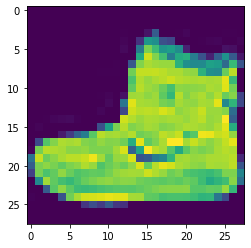

In [3]:
print(f"Image size: {X_train[0].shape}")
print(f"Image in array form: {X_train[0]}")
plt.imshow(X_train[0])

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [6]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28])) 
encoder.add(Dense(400, activation="relu")) 
encoder.add(Dense(200, activation="relu")) 
encoder.add(Dense(100, activation="relu")) 
encoder.add(Dense(50, activation="relu")) 
encoder.add(Dense(25, activation="relu")) 

In [7]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation="relu"))
decoder.add(Dense(100, activation="relu"))
decoder.add(Dense(200, activation="relu"))
decoder.add(Dense(400, activation="relu"))
decoder.add(Dense(28*28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [8]:
autoencoder = Sequential([encoder, decoder])

In [9]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 288us/sample - loss: 0.3903 - accuracy: 0.4893
Epoch 2/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.3272 - accuracy: 0.5002
Epoch 3/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.3149 - accuracy: 0.5028
Epoch 4/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.3082 - accuracy: 0.5041
Epoch 5/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.3039 - accuracy: 0.5047
Epoch 6/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.3007 - accuracy: 0.5052
Epoch 7/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.2984 - accuracy: 0.5055
Epoch 8/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2966 - accuracy: 0.5057
Epoch 9/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.2952 - accuracy: 0.5

In [25]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28])) 
encoder.add(Dense(400, activation="relu")) 
encoder.add(Dense(200, activation="relu")) 
encoder.add(Dense(100, activation="relu")) 
decoder = Sequential()
decoder.add(Dense(200, input_shape=[100], activation="relu"))
decoder.add(Dense(400, activation="relu"))
decoder.add(Dense(28*28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.5), metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 237us/sample - loss: 0.3766 - accuracy: 0.4902
Epoch 2/20
60000/60000 [==============================] - 14s 225us/sample - loss: 0.3184 - accuracy: 0.5034
Epoch 3/20
60000/60000 [==============================] - 13s 224us/sample - loss: 0.3086 - accuracy: 0.5050
Epoch 4/20
60000/60000 [==============================] - 13s 222us/sample - loss: 0.3024 - accuracy: 0.5060
Epoch 5/20
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2981 - accuracy: 0.5065
Epoch 6/20
60000/60000 [==============================] - 14s 225us/sample - loss: 0.2948 - accuracy: 0.5069
Epoch 7/20
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2920 - accuracy: 0.5073
Epoch 8/20
60000/60000 [==============================] - 13s 225us/sample - loss: 0.2897 - accuracy: 0.5075
Epoch 9/20
60000/60000 [==============================] - 14s 226us/sample - loss: 0.2878 - accuracy: 0.5

In [10]:
autoencoded_images = autoencoder.predict(X_train[:5])

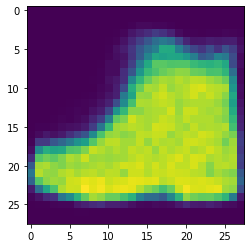

In [11]:
plt.imshow(autoencoded_images[0])

In [12]:
from tensorflow.keras.models import Model
autoencoder_encoder_only = Sequential()
for i in range(6):
    autoencoder_encoder_only.add(autoencoder.layers[0].layers[i])

In [13]:
middle_images = autoencoder_encoder_only.predict(X_test[:5])

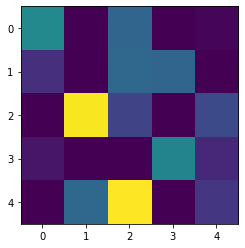

In [14]:
plt.imshow(middle_images[0].reshape(5,5))

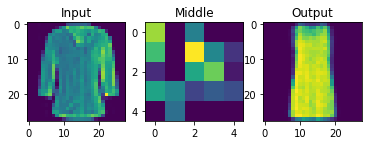

In [15]:
index = 4
fig = plt.figure()
fig.add_subplot(131)
plt.title('Input')
plt.imshow(X_test[index])
fig.add_subplot(132)
plt.title('Middle')
plt.imshow(middle_images[index].reshape(5,5))
fig.add_subplot(133)
plt.title('Output')
plt.imshow(autoencoded_images[index])
plt.show()

In [16]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    